In [1]:
#绘制直方图模块
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
class Plotter:
    def __init__(self):
        pass
    def plot_histogram(self, data_list, num_bins=10, color='blue', title='Histogram',xlabel='Values',ylabel='Frequency',net = 'None',
                    text = 'None',need_log_scale=False,data_range=[-1,-1],image_info = 'None',data_points='0',alpha = 1,label = 'None'):
        # 计算范围
        data_min, data_max = np.min(data_list), np.max(data_list)
        if data_range == [-1,-1]:
            data_range = (data_min, data_max)
        else :
            data_range = range
        hist, bin_edges=np.histogram(data_list,bins=num_bins,range=data_range)
        max_bin_index = np.argmax(hist)
        max_bin_range = (bin_edges[max_bin_index], bin_edges[max_bin_index + 1])
        max_bin_freq = hist[max_bin_index] # 该 bin 的频率
        print(f"频率最高的 bin 的范围是: {max_bin_range}，频率为: {max_bin_freq}")
        plt.hist(data_list,bins=num_bins,range=data_range,histtype='stepfilled',align='mid',orientation='vertical',color=color, alpha = alpha, label = label)
        if need_log_scale:
            plt.yscale('log')
        plt.title(title,fontsize=13)
        plt.xlabel(xlabel,fontsize=12)
        plt.tick_params(labelsize=12)
        plt.ylabel(ylabel,fontsize=12)
        plt.xlim(0, 5)
        plt.legend()
        #在图中添加文本
        '''plt.text(0.5, -0.2, f"The most frequent data bin: {max_bin_range}\nThe std of the data is {np.std(data_list)}",
                ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        if text != 'None':
            plt.text(0.5, -0.3, text, ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        if image_info != 'None':
            plt.text(0.5, -0.4, 'Generated from '+image_info+ '. The num of data points is '+ data_points, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)
        if net != 'None':
            plt.text(0.5, -0.5, 'The network is '+net, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)'''
    
    def plot_scatter(self,list1,list2,title='scatter',color='r',s=1,xlabel='xlabel',ylabel='ylabel', text = 'None',net = 'None',
                    image_info = 'None',data_points='0'):
        fig, ax1=plt.subplots(figsize=(10,10))
        # 绘制对角线
        ax1.plot([min(list1), max(list1)], [min(list1), max(list1)], 'k--', label='X=Y')
        # 绘制散点图
        ax1.scatter(list1, list2, s=s, color=color)
        ax1.set_xlabel(xlabel)
        ax1.set_ylabel(ylabel)
        plt.tick_params(labelsize=12)
        ax1.set_title(title)
        # 添加文本
        plt.text(0.5, -0.1, text, ha='center', va='center', transform=plt.gca().transAxes)
        # 拟合散点图
        coefficients = np.polyfit(list1, list2, 1)
        polynomial = np.poly1d(coefficients)
        x_fit = np.linspace(min(list1), max(list1), 100)
        y_fit = polynomial(x_fit)
        if text != 'None':
            plt.text(0.5, -0.3, text, ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        if image_info != 'None':
            plt.text(0.5, -0.2, 'Generated from '+image_info+ '. The num of data points is '+ data_points, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)
        if net != 'None':
            plt.text(0.5, -0.4, 'The network is '+net, ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        # 绘制最小二乘拟合线
        ax1.plot(x_fit, y_fit, 'r-', label='Least Squares Fit', linewidth=2, alpha=0.7,color='b')
        
    def plot_error_pixel_map(self, true_list, predict_list, HIGTHT=56, WIDTH=56,text = 'None',net='None',
                    image_info = 'None',data_points='0'):
        # 计算误差矩阵
        Error_pixel_map = np.array(true_list) - np.array(predict_list)
        Error_pixel_map = Error_pixel_map.astype(np.float32).reshape(HIGTHT, WIDTH)
        # 创建颜色映射
        plt.tick_params(labelsize=12)
        cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['red', 'white', 'black'])
        norm = mcolors.TwoSlopeNorm(vmin=Error_pixel_map.min(), vcenter=0, vmax=Error_pixel_map.max())

        # 绘制误差像素图
        plt.figure(figsize=(10, 5))
        plt.imshow(Error_pixel_map, cmap=cmap, norm=norm)
        plt.colorbar(label='Error Value')
        plt.title('Error Pixel Map')
        if text != 'None':
            plt.text(0.5, -0.1, text, ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        if image_info != 'None':
            plt.text(0.5, -0.2, 'Generated from '+image_info+ '. The num of data points is '+ data_points, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)
        if net != 'None':
            plt.text(0.5, -0.3, 'The network is '+net, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)
        plt.tight_layout()
        plt.show()

In [2]:
import numpy as np

with open("errors_CNN_jet_dis.txt", 'r') as file:
    lines = file.readlines()

differenceCNN = np.array([line.strip() for line in lines], dtype=float)
print(differenceCNN)
with open("errors_RNNseq2seq_jet_dis.txt", 'r') as file:
    lines = file.readlines()

differenceRNNseq2seq = np.array([line.strip() for line in lines], dtype=float)
with open("errors_UNet_jet_dis.txt", 'r') as file:
    lines = file.readlines()

differenceUNet = np.array([line.strip() for line in lines], dtype=float)
with open("errors_UTran_jet_dis.txt", 'r') as file:
    lines = file.readlines()

differenceUTran = np.array([line.strip() for line in lines], dtype=float)
with open("errors_CNN_3D_jet_dis.txt", 'r') as file:
    lines = file.readlines()

differenceCNN_3D = np.array([line.strip() for line in lines], dtype=float)

[0.61970602 0.38995647 0.61162488 0.41568234 0.30995541 0.40232369
 0.46436386 0.44778522 0.5222986  0.53487543 0.55704986 0.3194917
 0.42416839 0.32126604 0.34789152 0.29063808 0.43104792 0.48900802
 0.5810283  0.72363281 0.57437824 0.46955115 0.430712   0.404973
 0.30850321 0.39102154 0.55430795 0.48951429 0.43499544 0.29984485
 0.24904638 0.4265462  0.22115798 0.38335003 0.68596575 0.48676028
 0.39959362 0.35019584 0.28367266 0.30133986 0.3246651  0.38188623
 0.42165177 0.51526977 0.4883287  0.58137724 0.38105959 0.38689279
 0.49648287 0.28696923 0.64377381 0.43104945 0.31455148 0.5145689
 0.49491995 0.44156561 0.50659483 0.26396355 0.34718924 0.45115133
 0.27401597 0.28670816 0.64114303 0.44689387 0.52053461 0.67762087
 0.50421914 0.44522337 0.3115723  0.25040804 0.28716133 0.80719654
 0.34479892 0.59911524 0.51222437 0.64317113 0.27010698 0.3678117
 0.23609084 0.42471892 0.57350303 0.35728607 0.48525182 0.45104352
 0.33587751 0.39545145 0.24138436 0.29673053 0.32024951 0.50836322


频率最高的 bin 的范围是: (0.39786235883367993, 0.40821446333306743)，频率为: 39
频率最高的 bin 的范围是: (0.23420743094009716, 0.2496341599302014)，频率为: 116
频率最高的 bin 的范围是: (0.49733009400062833, 0.5112782419684934)，频率为: 50
频率最高的 bin 的范围是: (0.14490167944354915, 0.14999272332587948)，频率为: 45
频率最高的 bin 的范围是: (0.38270172071206143, 0.39288131963200135)，频率为: 52


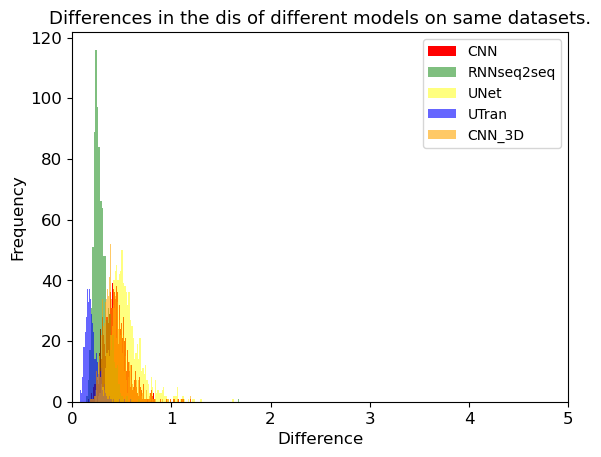

In [3]:
plotter = Plotter()
plotter.plot_histogram(differenceCNN, num_bins = 100, color='red', alpha = 1,label = 'CNN', title = 'Differences in the dis of different models on same datasets.'
                       ,xlabel = 'Difference')
plotter.plot_histogram(differenceRNNseq2seq, num_bins = 100, color='green', alpha = 0.5,label = 'RNNseq2seq', title = 'Differences in the dis of different models on same datasets.'
                       ,xlabel = 'Difference')
plotter.plot_histogram(differenceUNet, num_bins = 100, color='yellow', alpha = 0.5,label = 'UNet', title = 'Differences in the dis of different models on same datasets.'
                       ,xlabel = 'Difference')
plotter.plot_histogram(differenceUTran, num_bins = 100, color='blue', alpha = 0.6,label = 'UTran', title = 'Differences in the dis of different models on same datasets.'
                       ,xlabel = 'Difference')
plotter.plot_histogram(differenceCNN_3D, num_bins = 100, color='orange', alpha = 0.6,label = 'CNN_3D', title = 'Differences in the dis of different models on same datasets.'
                       ,xlabel = 'Difference')

In [4]:
#绘制直方图模块
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
class Plotter:
    def __init__(self):
        pass
    def plot_histogram(self, data_list, num_bins=10, color='blue', title='Histogram',xlabel='Values',ylabel='Frequency',net = 'None',
                    text = 'None',need_log_scale=False,data_range=[-1,-1],image_info = 'None',data_points='0',alpha = 1,label = 'None'):
        # 计算范围
        data_min, data_max = np.min(data_list), np.max(data_list)
        if data_range == [-1,-1]:
            data_range = (data_min, data_max)
        else :
            data_range = range
        hist, bin_edges=np.histogram(data_list,bins=num_bins,range=data_range)
        max_bin_index = np.argmax(hist)
        max_bin_range = (bin_edges[max_bin_index], bin_edges[max_bin_index + 1])
        max_bin_freq = hist[max_bin_index] # 该 bin 的频率
        print(f"频率最高的 bin 的范围是: {max_bin_range}，频率为: {max_bin_freq}")
        plt.hist(data_list,bins=num_bins,range=data_range,histtype='stepfilled',align='mid',orientation='vertical',color=color, alpha = alpha, label = label)
        if need_log_scale:
            plt.yscale('log')
        plt.title(title,fontsize=13)
        plt.xlabel(xlabel,fontsize=12)
        plt.tick_params(labelsize=12)
        plt.ylabel(ylabel,fontsize=12)
        plt.xlim(-3, 3)
        plt.legend()
        #在图中添加文本
        '''plt.text(0.5, -0.2, f"The most frequent data bin: {max_bin_range}\nThe std of the data is {np.std(data_list)}",
                ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        if text != 'None':
            plt.text(0.5, -0.3, text, ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        if image_info != 'None':
            plt.text(0.5, -0.4, 'Generated from '+image_info+ '. The num of data points is '+ data_points, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)
        if net != 'None':
            plt.text(0.5, -0.5, 'The network is '+net, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)'''
    
    def plot_scatter(self,list1,list2,title='scatter',color='r',s=1,xlabel='xlabel',ylabel='ylabel', text = 'None',net = 'None',
                    image_info = 'None',data_points='0'):
        fig, ax1=plt.subplots(figsize=(10,10))
        # 绘制对角线
        ax1.plot([min(list1), max(list1)], [min(list1), max(list1)], 'k--', label='X=Y')
        # 绘制散点图
        ax1.scatter(list1, list2, s=s, color=color)
        ax1.set_xlabel(xlabel)
        ax1.set_ylabel(ylabel)
        plt.tick_params(labelsize=12)
        ax1.set_title(title)
        # 添加文本
        plt.text(0.5, -0.1, text, ha='center', va='center', transform=plt.gca().transAxes)
        # 拟合散点图
        coefficients = np.polyfit(list1, list2, 1)
        polynomial = np.poly1d(coefficients)
        x_fit = np.linspace(min(list1), max(list1), 100)
        y_fit = polynomial(x_fit)
        if text != 'None':
            plt.text(0.5, -0.3, text, ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        if image_info != 'None':
            plt.text(0.5, -0.2, 'Generated from '+image_info+ '. The num of data points is '+ data_points, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)
        if net != 'None':
            plt.text(0.5, -0.4, 'The network is '+net, ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        # 绘制最小二乘拟合线
        ax1.plot(x_fit, y_fit, 'r-', label='Least Squares Fit', linewidth=2, alpha=0.7,color='b')
        
    def plot_error_pixel_map(self, true_list, predict_list, HIGTHT=56, WIDTH=56,text = 'None',net='None',
                    image_info = 'None',data_points='0'):
        # 计算误差矩阵
        Error_pixel_map = np.array(true_list) - np.array(predict_list)
        Error_pixel_map = Error_pixel_map.astype(np.float32).reshape(HIGTHT, WIDTH)
        # 创建颜色映射
        plt.tick_params(labelsize=12)
        cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['red', 'white', 'black'])
        norm = mcolors.TwoSlopeNorm(vmin=Error_pixel_map.min(), vcenter=0, vmax=Error_pixel_map.max())

        # 绘制误差像素图
        plt.figure(figsize=(10, 5))
        plt.imshow(Error_pixel_map, cmap=cmap, norm=norm)
        plt.colorbar(label='Error Value')
        plt.title('Error Pixel Map')
        if text != 'None':
            plt.text(0.5, -0.1, text, ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        if image_info != 'None':
            plt.text(0.5, -0.2, 'Generated from '+image_info+ '. The num of data points is '+ data_points, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)
        if net != 'None':
            plt.text(0.5, -0.3, 'The network is '+net, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)
        plt.tight_layout()
        plt.show()

In [5]:
import numpy as np

with open("errors_CNN_jet_e.txt", 'r') as file:
    lines = file.readlines()

differenceCNN = np.array([line.strip() for line in lines], dtype=float)
print(differenceCNN)
with open("errors_RNNseq2seq_jet_e.txt", 'r') as file:
    lines = file.readlines()

differenceRNNseq2seq = np.array([line.strip() for line in lines], dtype=float)
with open("errors_UNet_jet_pts.txt", 'r') as file:
    lines = file.readlines()

differenceUNet = np.array([line.strip() for line in lines], dtype=float)
with open("errors_UTran_jet_e.txt", 'r') as file:
    lines = file.readlines()

differenceUTran = np.array([line.strip() for line in lines], dtype=float)
with open("errors_CNN_3D_jet_E.txt", 'r') as file:
    lines = file.readlines()

differenceCNN_3D = np.array([line.strip() for line in lines], dtype=float)

[-4.03249887e-01  1.82504647e-01 -2.24270960e-01 -1.66034676e-01
 -6.66165318e-03 -2.51901096e-01 -3.65393783e-01  2.43752871e-01
 -4.03449046e-01 -8.37618494e-02 -2.35151280e-01 -5.53364640e-01
 -4.58869483e-01 -2.82110706e-01  1.71159105e-01 -2.96992513e-01
 -5.31994240e-01 -4.16639399e-01 -2.07235945e-01 -5.46914157e-01
 -1.97077473e-01 -3.06357898e-01 -3.14294157e-01 -4.29542606e-01
 -3.75373713e-01 -3.65296229e-01 -6.54103762e-01 -4.47740628e-01
 -4.29951215e-01 -1.65640040e-01 -3.31357480e-01 -4.49304877e-02
 -3.77260090e-01 -4.87692645e-01 -6.22536275e-01 -4.57921544e-01
 -3.50719637e-01 -2.79170532e-01 -6.04062190e-01 -4.34444749e-01
 -2.42797212e-01 -4.73707026e-01 -2.94400571e-01 -2.98319697e-01
 -2.11792238e-01 -3.46511191e-01 -6.37439618e-01 -7.87358665e-02
  6.80878920e-01 -5.70863135e-01 -5.45739831e-01 -3.76823584e-01
 -3.87422382e-01 -3.20026155e-01 -4.44439074e-01 -4.64221913e-01
  2.32422996e-02 -2.03492528e-01 -3.44266961e-01 -4.65220467e-01
 -3.97126194e-01 -4.15639

FileNotFoundError: [Errno 2] No such file or directory: 'errors_UNet_jet_pts.txt'

频率最高的 bin 的范围是: (-0.4488992041408894, -0.44186488085799874)，频率为: 18
频率最高的 bin 的范围是: (-0.4867322812269087, -0.46587903622354676)，频率为: 47
频率最高的 bin 的范围是: (0.5001197235942013, 0.5015145383909878)，频率为: 9
频率最高的 bin 的范围是: (0.19275749193745423, 0.19326659632568727)，频率为: 9
频率最高的 bin 的范围是: (0.38270172071206143, 0.39288131963200135)，频率为: 52


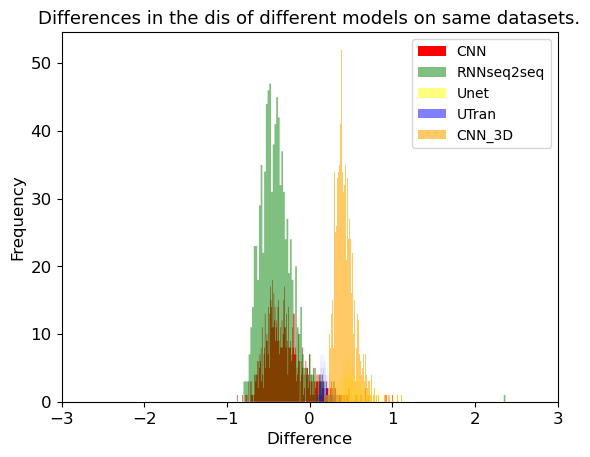

In [6]:
plotter = Plotter()
plotter.plot_histogram(differenceCNN, num_bins = 1000, color='red', alpha = 1,label = 'CNN', title = 'Differences in the E of different models on same datasets.'
                       ,xlabel = 'Difference')
plotter.plot_histogram(differenceRNNseq2seq, num_bins = 1000, color='green', alpha = 0.5,label = 'RNNseq2seq', title = 'Differences in the E of different models on same datasets.'
                       ,xlabel = 'Difference')
plotter.plot_histogram(differenceUNet, num_bins = 1000, color='yellow', alpha = 0.5,label = 'Unet', title = 'Differences in the E of different models on same datasets.'
                       ,xlabel = 'Difference')
plotter.plot_histogram(differenceUTran, num_bins = 1000, color='blue', alpha = 0.5,label = 'UTran', title = 'Differences in the E of different models on same datasets.'
                       ,xlabel = 'Difference')
plotter.plot_histogram(differenceCNN_3D, num_bins = 100, color='orange', alpha = 0.6,label = 'CNN_3D', title = 'Differences in the dis of different models on same datasets.'
                       ,xlabel = 'Difference')

In [7]:
#绘制直方图模块
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
class Plotter:
    def __init__(self):
        pass
    def plot_histogram(self, data_list, num_bins=10, color='blue', title='Histogram',xlabel='Values',ylabel='Frequency',net = 'None',
                    text = 'None',need_log_scale=False,data_range=[-1,-1],image_info = 'None',data_points='0',alpha = 1,label = 'None'):
        # 计算范围
        data_min, data_max = np.min(data_list), np.max(data_list)
        if data_range == [-1,-1]:
            data_range = (data_min, data_max)
        else :
            data_range = range
        hist, bin_edges=np.histogram(data_list,bins=num_bins,range=data_range)
        max_bin_index = np.argmax(hist)
        max_bin_range = (bin_edges[max_bin_index], bin_edges[max_bin_index + 1])
        max_bin_freq = hist[max_bin_index] # 该 bin 的频率
        print(f"频率最高的 bin 的范围是: {max_bin_range}，频率为: {max_bin_freq}")
        plt.hist(data_list,bins=num_bins,range=data_range,histtype='stepfilled',align='mid',orientation='vertical',color=color, alpha = alpha, label = label)
        if need_log_scale:
            plt.yscale('log')
        plt.title(title,fontsize=13)
        plt.xlabel(xlabel,fontsize=12)
        plt.tick_params(labelsize=12)
        plt.ylabel(ylabel,fontsize=12)
        plt.xlim(0, 20)
        plt.legend()
        #在图中添加文本
        '''plt.text(0.5, -0.2, f"The most frequent data bin: {max_bin_range}\nThe std of the data is {np.std(data_list)}",
                ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        if text != 'None':
            plt.text(0.5, -0.3, text, ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        if image_info != 'None':
            plt.text(0.5, -0.4, 'Generated from '+image_info+ '. The num of data points is '+ data_points, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)
        if net != 'None':
            plt.text(0.5, -0.5, 'The network is '+net, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)'''
    
    def plot_scatter(self,list1,list2,title='scatter',color='r',s=1,xlabel='xlabel',ylabel='ylabel', text = 'None',net = 'None',
                    image_info = 'None',data_points='0'):
        fig, ax1=plt.subplots(figsize=(10,10))
        # 绘制对角线
        ax1.plot([min(list1), max(list1)], [min(list1), max(list1)], 'k--', label='X=Y')
        # 绘制散点图
        ax1.scatter(list1, list2, s=s, color=color)
        ax1.set_xlabel(xlabel)
        ax1.set_ylabel(ylabel)
        plt.tick_params(labelsize=12)
        ax1.set_title(title)
        # 添加文本
        plt.text(0.5, -0.1, text, ha='center', va='center', transform=plt.gca().transAxes)
        # 拟合散点图
        coefficients = np.polyfit(list1, list2, 1)
        polynomial = np.poly1d(coefficients)
        x_fit = np.linspace(min(list1), max(list1), 100)
        y_fit = polynomial(x_fit)
        if text != 'None':
            plt.text(0.5, -0.3, text, ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        if image_info != 'None':
            plt.text(0.5, -0.2, 'Generated from '+image_info+ '. The num of data points is '+ data_points, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)
        if net != 'None':
            plt.text(0.5, -0.4, 'The network is '+net, ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        # 绘制最小二乘拟合线
        ax1.plot(x_fit, y_fit, 'r-', label='Least Squares Fit', linewidth=2, alpha=0.7,color='b')
        
    def plot_error_pixel_map(self, true_list, predict_list, HIGTHT=56, WIDTH=56,text = 'None',net='None',
                    image_info = 'None',data_points='0'):
        # 计算误差矩阵
        Error_pixel_map = np.array(true_list) - np.array(predict_list)
        Error_pixel_map = Error_pixel_map.astype(np.float32).reshape(HIGTHT, WIDTH)
        # 创建颜色映射
        plt.tick_params(labelsize=12)
        cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['red', 'white', 'black'])
        norm = mcolors.TwoSlopeNorm(vmin=Error_pixel_map.min(), vcenter=0, vmax=Error_pixel_map.max())

        # 绘制误差像素图
        plt.figure(figsize=(10, 5))
        plt.imshow(Error_pixel_map, cmap=cmap, norm=norm)
        plt.colorbar(label='Error Value')
        plt.title('Error Pixel Map')
        if text != 'None':
            plt.text(0.5, -0.1, text, ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        if image_info != 'None':
            plt.text(0.5, -0.2, 'Generated from '+image_info+ '. The num of data points is '+ data_points, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)
        if net != 'None':
            plt.text(0.5, -0.3, 'The network is '+net, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)
        plt.tight_layout()
        plt.show()

In [8]:
import numpy as np

with open("errors_CNN_jet_2dis.txt", 'r') as file:
    lines = file.readlines()

differenceCNN = np.array([line.strip() for line in lines], dtype=float)
print(differenceCNN)
with open("errors_RNNseq2seq_jet_2dis.txt", 'r') as file:
    lines = file.readlines()

differenceRNNseq2seq = np.array([line.strip() for line in lines], dtype=float)
with open("errors_UNet_jet_2dis.txt", 'r') as file:
    lines = file.readlines()

differenceUNet = np.array([line.strip() for line in lines], dtype=float)
with open("errors_UTran_jet_2dis.txt", 'r') as file:
    lines = file.readlines()

differenceUTran = np.array([line.strip() for line in lines], dtype=float)
with open("errors_CNN_3D_jet_2dis.txt", 'r') as file:
    lines = file.readlines()

differenceCNN_3D = np.array([line.strip() for line in lines], dtype=float)

[4.64677538e+00 4.21632758e+00 8.71768718e+00 3.93190378e+00
 2.84306415e+00 8.98872910e+00 3.63609433e+00 4.19688815e+00
 4.50738357e+00 2.15522504e+00 1.54384088e+00 6.52880573e-01
 2.17595766e+00 6.03121364e+00 1.35382887e+00 1.30864382e-01
 2.36142317e+00 2.48860913e+00 2.23506683e+00 8.72163804e+00
 4.72714735e+00 5.07775372e+00 6.68417113e+00 5.23420725e+00
 4.09217394e+00 8.11744027e-01 5.79611815e-01 1.25615751e+00
 1.95690279e+00 1.60503013e+00 5.49709215e+00 5.22863286e+00
 9.65601344e-02 4.22914216e+00 3.14473096e+00 7.64427319e+00
 2.48866622e+00 8.91611647e-01 1.11609874e+00 3.90766143e+00
 2.83275922e-01 5.70265496e+00 1.97372382e+00 1.19989889e+01
 7.65150196e-01 1.09380247e+01 4.53706792e+00 3.74293935e+00
 5.78986753e+00 1.03063747e+00 1.09314918e+01 3.44894715e+00
 2.67907023e+00 2.87856769e+00 2.76067815e+00 5.45528328e+00
 6.91552355e+00 1.97268195e+00 3.26848060e-01 1.20471497e+00
 3.64724444e+00 1.17103164e+00 1.07773926e+01 6.46413170e+00
 8.72670081e+00 1.376856

频率最高的 bin 的范围是: (0.5794034649420974, 0.7211649322203271)，频率为: 24
频率最高的 bin 的范围是: (0.5714501489629129, 0.7097975796036113)，频率为: 24
频率最高的 bin 的范围是: (1.9554395558865387, 2.0856133956972105)，频率为: 25
频率最高的 bin 的范围是: (0.33009360421789924, 0.48544523963665276)，频率为: 29
频率最高的 bin 的范围是: (3.446718235879356, 3.5841889423105866)，频率为: 29


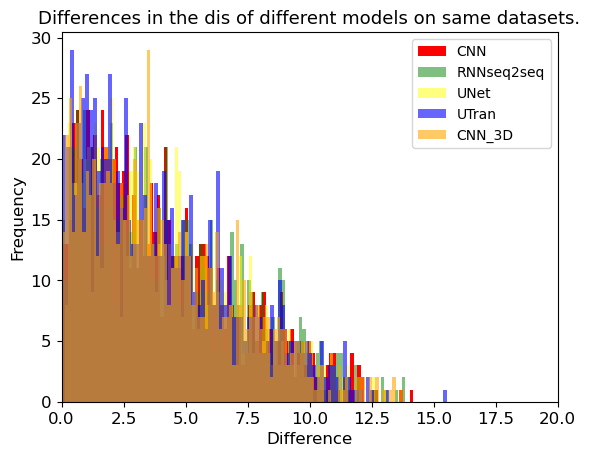

In [9]:
plotter = Plotter()
plotter.plot_histogram(differenceCNN, num_bins = 100, color='red', alpha = 1,label = 'CNN', title = 'Differences in the 2dis of different models on same datasets.'
                       ,xlabel = 'Difference')
plotter.plot_histogram(differenceRNNseq2seq, num_bins = 100, color='green', alpha = 0.5,label = 'RNNseq2seq', title = 'Differences in the 2dis of different models on same datasets.'
                       ,xlabel = 'Difference')
plotter.plot_histogram(differenceUNet, num_bins = 100, color='yellow', alpha = 0.5,label = 'UNet', title = 'Differences in the 2dis of different models on same datasets.'
                       ,xlabel = 'Difference')
plotter.plot_histogram(differenceUTran, num_bins = 100, color='blue', alpha = 0.6,label = 'UTran', title = 'Differences in the 2dis of different models on same datasets.'
                       ,xlabel = 'Difference')
plotter.plot_histogram(differenceCNN_3D, num_bins = 100, color='orange', alpha = 0.6,label = 'CNN_3D', title = 'Differences in the dis of different models on same datasets.'
                       ,xlabel = 'Difference')